---


# <center>$ \LARGE\textsf {PyData Venice} $</center>
### <center>$ \large\textsf {2020-10-16} $</center>
***
## <center>$ \large\textsf {Bayes & PyMC3} $</center>
***
#### <center>$ \textsf {Marco Goldin} $</center>

## <center>1. Intro</center>

> <center>$ \LARGE\textit{Everything is random...}$</center>

### Alcuni vantaggi dell'analisi bayesiana...

- Offre un ambiente pratico per un ampio spettro di modelli, come i [***modelli gerarchici***](https://docs.pymc.io/notebooks/GLM-hierarchical.html).
- La famiglia degli algoritmi MCMC rende potenzialmente computabili tutti i modelli parametrici.
- Principio di verosimigilanza (*LP*): i classici metodi inferenziali non sottostanno al principio di verosimiglianza.
- Risposte interpretabili: "il valore reale del parametro $\theta$ ha una probabilità del 95% di ricadere nel 95% dell'intervallo di credibilità."
- *Small sample* | *Large sample*

### ... e alcuni svantaggi

- Problema della scelta dell'*a priori* (incertezza Vs casualità).
- *Probabilità a posteriori* fortemente influenzate dall'*a priori*.
- *Distribuzioni a posteriori* non sempre facili da includere in meta-analisi, a meno di disporre di descrizioni parametriche frequentiste delle distribuzioni stesse.
- Costo computazionale molto alto.
- I metodi bayesiani eccellono meglio laddove esiste una esperienza accumulata, una sorta di *base di conoscenza*. Se la conoscenza non è disponibile o è povera, i risultati possono essere fuorivianti.
---

### Quali ambiti?

- e-commerce
- area assicurativa
- finanza
- sanità/ricerca medica
---

### E principalmente per che cosa?

- Per quel che riguarda ad esempio l'intersezione con il machine learning, sostanzialmente: modelli classificatori.
---

## <center>2. PPL to the rescue!</center>

PyMC3 e Stan sono, probabilmente ancora adesso, i 2 linguaggi di programmazione probabilistica più utilizzati.
PyMC3 (2013) è stabile e maturo, deriva da una riscrittura completa di PyMC2 (che si appoggiava a Fortran per la parte computazionale) e usa **Theano** come backend per il transcoding dei modelli in C.

- Theano ***tensor*** > NumPy ***ndarray***

- Sintassi chiara e concisa, tra l'altro molto vicina alla sintassi utilizzata dagli statistici per descrivere modelli probabilistici.

- lazy evaluation (ad esempio: ```eval()```)
- [PyMC3 e Theano](https://docs.pymc.io/PyMC3_and_Theano.html)

---

Nonostante Theano non sia oramai più sviluppato, il fatto di essere arrivato a una versione stabile non pregiudica  l'adozione di PyMC3, in ogni caso il "team" PyMC3 ha assicurato un *long support* autonomo in questo senso.

- Benché ancora in beta, **PyMC4** sarà un'ulteriore evoluzione con [l'utilizzo di **Tensorflow** come backend](https://medium.com/@pymc_devs/theano-tensorflow-and-the-future-of-pymc-6c9987bb19d5).
---

Essenzialmente PyMC3 nasce come libreria per il ***Markov Chain Monte Carlo*** *sampling* attraverso l'utilizzo di diversi *samplers* come *Metropolis*, *Slice*, *Hamiltonian Monte Carlo*, etc...

---

## <center>3. PyMC3</center>

In [1]:
import pymc3 as pm
import theano.tensor as tt
import theano
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import arviz as az
import seaborn as sns

### <center>Distribuzioni in PyMC3</center>

In [2]:
pymc3_distribuzioni=[d for d in dir(pm.distributions) if d[0].isupper()]
pymc3_distribuzioni[0:int(len(pymc3_distribuzioni)/2)]

['AR',
 'AR1',
 'Bernoulli',
 'Beta',
 'BetaBinomial',
 'Binomial',
 'Bound',
 'Categorical',
 'Cauchy',
 'ChiSquared',
 'Constant',
 'ConstantDist',
 'Continuous',
 'DensityDist',
 'Dirichlet',
 'Discrete',
 'DiscreteUniform',
 'DiscreteWeibull',
 'Distribution',
 'ExGaussian',
 'Exponential',
 'Flat',
 'GARCH11',
 'Gamma',
 'GaussianRandomWalk',
 'Geometric',
 'Gumbel',
 'HalfCauchy',
 'HalfFlat',
 'HalfNormal',
 'HalfStudentT',
 'Interpolated',
 'InverseGamma',
 'KroneckerNormal',
 'Kumaraswamy',
 'LKJCholeskyCov']

In [3]:
pymc3_distribuzioni[int(len(pymc3_distribuzioni)/2):]

['LKJCorr',
 'Laplace',
 'Logistic',
 'LogitNormal',
 'Lognormal',
 'MatrixNormal',
 'Mixture',
 'Moyal',
 'Multinomial',
 'MvGaussianRandomWalk',
 'MvNormal',
 'MvStudentT',
 'MvStudentTRandomWalk',
 'NegativeBinomial',
 'NoDistribution',
 'Normal',
 'NormalMixture',
 'OrderedLogistic',
 'Pareto',
 'Poisson',
 'Rice',
 'Simulator',
 'SkewNormal',
 'StudentT',
 'TensorType',
 'Triangular',
 'TruncatedNormal',
 'Uniform',
 'VonMises',
 'Wald',
 'Weibull',
 'Wishart',
 'WishartBartlett',
 'ZeroInflatedBinomial',
 'ZeroInflatedNegativeBinomial',
 'ZeroInflatedPoisson']

In [4]:
d = pm.Normal.dist(mu=0, sd=1)

In [5]:
print(type(d.dist()))
d.dist()

<class 'pymc3.distributions.continuous.Normal'>


In [6]:
d.shape

array([], dtype=float64)

In [7]:
help(pm.sample)

Help on function sample in module pymc3.sampling:

sample(draws=1000, step=None, init='auto', n_init=200000, start=None, trace=None, chain_idx=0, chains=None, cores=None, tune=1000, progressbar=True, model=None, random_seed=None, discard_tuned_samples=True, compute_convergence_checks=True, callback=None, *, return_inferencedata=None, idata_kwargs: dict = None, mp_ctx=None, pickle_backend: str = 'pickle', **kwargs)
    Draw samples from the posterior using the given step methods.
    
    Multiple step methods are supported via compound step methods.
    
    Parameters
    ----------
    draws : int
        The number of samples to draw. Defaults to 1000. The number of tuned samples are discarded
        by default. See ``discard_tuned_samples``.
    init : str
        Initialization method to use for auto-assigned NUTS samplers.
    
        * auto: Choose a default initialization method automatically.
          Currently, this is ``jitter+adapt_diag``, but this can change in the futu

In [8]:
print('\n'.join(m for m in dir(pm.step_methods) if m[0].isupper()))

BinaryGibbsMetropolis
BinaryMetropolis
CategoricalGibbsMetropolis
CauchyProposal
CompoundStep
DEMetropolis
DEMetropolisZ
ElemwiseCategorical
EllipticalSlice
HamiltonianMC
LaplaceProposal
Metropolis
MultivariateNormalProposal
NUTS
NormalProposal
PoissonProposal
Slice


### <center>Modelli lineari</center><br />
<center>$ \LARGE y \sim Normal(\mu, \sigma)$</center><br />
<center>$ \LARGE \mu = \alpha + \beta \! x $</center><br />

<center>$\mu$ è la classica parte lineare del modello con coefficiente angolare $\beta$<br /></center>

### <center>In termini bayesiani, tutto è sempre espresso in termini probabilistici:</center><br />
### <center>Questo permette di trattare i parametri in un'analisi della regressione come provenienti da distribuzioni piuttosto che da stime puntuali.</center><br />
<center>$\LARGE \alpha \sim \mathcal{N}(0,100) $</center><br />

<center>$\LARGE \beta \sim \mathcal{N}(0,100)$</center><br />
<center>$\LARGE \sigma \sim$ $\LARGE \text{Exponential}(1/100) $ </center><br />

### Dal punto di vista probabilistico, un modello di regressione lineare può essere espresso quindi come: <br />
<center>$\LARGE y \sim \mathcal{N}(\mu = \alpha + x \beta,\epsilon) $</center><br />

<center>si assume la distribuzione normale del vettore y, con una media di $\alpha + \beta x$ e deviazione standard $\epsilon$</center>

In [9]:
# Fit mel modello lineare
# dati osservati
np.random.seed(123)
n = 11
_a = 6
_b = 2
x = np.linspace(0, 1, n)
y = _a*x + _b + np.random.randn(n)

In [10]:
iterazioni = 5000
with pm.Model() as linreg:
    a = pm.Normal('a', mu=0, sd=100)
    b = pm.Normal('b', mu=0, sd=100)
    sigma = pm.HalfNormal('sigma', sd=1)

    y_est = a*x + b
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    # tutte le informazion sull'a posteriori si troveranno nel 'trace'
    trace = pm.sample(iterazioni, random_seed=123)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 25 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


### <center>Tutte le informazion sul nostro "a posteriori" sono contenute nel 'trace'</center>

In [11]:
trace.stat_names

{'depth',
 'diverging',
 'energy',
 'energy_error',
 'max_energy_error',
 'mean_tree_accept',
 'model_logp',
 'perf_counter_diff',
 'perf_counter_start',
 'process_time_diff',
 'step_size',
 'step_size_bar',
 'tree_size',
 'tune'}

In [12]:
pm.summary(trace)

/Users/marcogoldin/anaconda3/envs/bayes/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,5.797,1.338,3.308,8.365,0.017,0.012,6047.0,6047.0,6185.0,6525.0,1.0
b,1.794,0.792,0.323,3.305,0.010,0.007,5775.0,5584.0,5922.0,6588.0,1.0
sigma,1.336,0.297,0.844,1.902,0.004,0.002,7126.0,7126.0,6515.0,5091.0,1.0


/Users/marcogoldin/anaconda3/envs/bayes/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

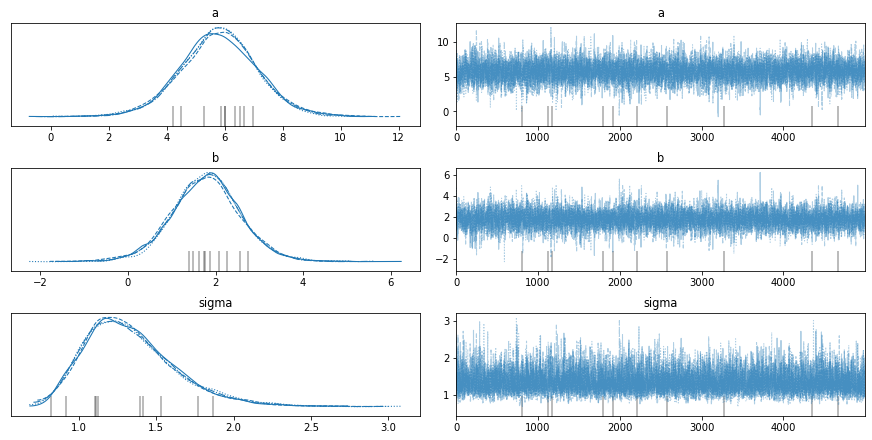

In [13]:
t = trace[iterazioni//2:]
pm.traceplot(trace, var_names=['a', 'b','sigma'])

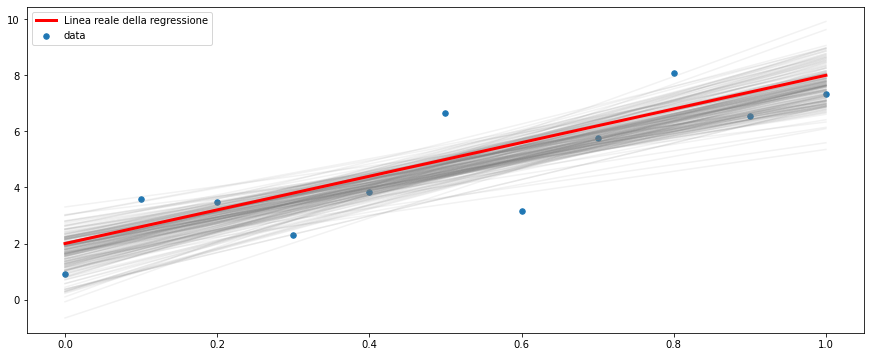

In [14]:
plt.figure(figsize=(15,6))
plt.scatter(x, y, s=30, label='data')
for a_, b_ in zip(t['a'][-200:], t['b'][-200:]):
    plt.plot(x, a_*x + b_, c='gray', alpha=0.1)
plt.plot(x, _a*x + _b, label='Linea reale della regressione', lw=3., c='red')
plt.legend()
plt.show()

In [15]:
ppc = pm.sample_posterior_predictive(trace, samples=500, model=linreg, size=11)

/Users/marcogoldin/anaconda3/envs/bayes/lib/python3.8/site-packages/pymc3/sampling.py:1707: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [16]:
ppc

{'y': array([[[ 1.55823376,  2.76835847,  4.50021674, ...,  2.3612162 ,
           3.22648365,  3.37671667],
         [ 3.81010068,  3.07255908,  1.02476092, ..., -0.53468293,
           2.49190837,  0.97880675],
         [ 3.4885916 ,  2.11801518,  3.42225296, ...,  3.62869871,
           3.24466927,  3.74185147],
         ...,
         [ 6.09848344,  7.68906184,  6.23352931, ...,  6.45999376,
           7.08698901,  4.70016858],
         [ 7.73344864,  7.87940741,  7.11634685, ...,  8.47745343,
           7.9487732 ,  5.69846356],
         [ 4.46905742,  7.02107738,  8.18798838, ...,  9.62084276,
           9.10830304,  7.24998615]],
 
        [[ 1.7538192 ,  1.62029993,  1.95892515, ...,  3.34219596,
           1.4330308 ,  1.53878167],
         [ 3.50425941,  2.67422486,  2.54618449, ...,  4.82213137,
           6.61621384,  3.11533479],
         [ 0.95375906,  2.16496186,  3.43892675, ...,  4.48134276,
           3.87817528,  3.31290944],
         ...,
         [ 7.50055359,  5.21

/Users/marcogoldin/anaconda3/envs/bayes/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


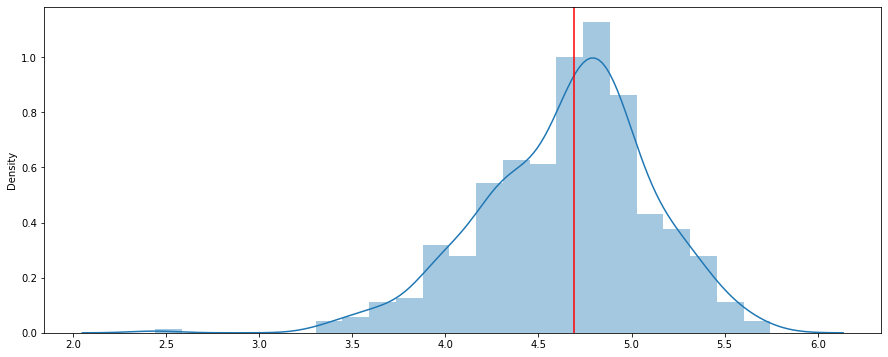

In [17]:
fig=plt.figure(figsize=(15,6))
sns.distplot([np.mean(n) for n in ppc['y']], kde=True, )
plt.axvline(np.mean(y), color='red')
plt.show()

### <center>Salvataggio della traccia del modello</center>

In [18]:
pm.save_trace(trace, 'my_trace', overwrite=True)

'my_trace'

In [19]:
with pm.Model() as my_trace:
    a = pm.Normal('a', mu=0, sd=100)
    b = pm.Normal('b', mu=0, sd=100)
    sigma = pm.HalfNormal('sigma', sd=1)

    y_est = a*x + b
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    # tutte le informazion sull'a posteriori si troveranno nel 'trace'
    tr = pm.load_trace('my_trace')

In [20]:
pm.summary(tr)

/Users/marcogoldin/anaconda3/envs/bayes/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,5.797,1.338,3.308,8.365,0.017,0.012,6047.0,6047.0,6185.0,6525.0,1.0
b,1.794,0.792,0.323,3.305,0.010,0.007,5775.0,5584.0,5922.0,6588.0,1.0
sigma,1.336,0.297,0.844,1.902,0.004,0.002,7126.0,7126.0,6515.0,5091.0,1.0


/Users/marcogoldin/anaconda3/envs/bayes/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

<Figure size 504x504 with 0 Axes>

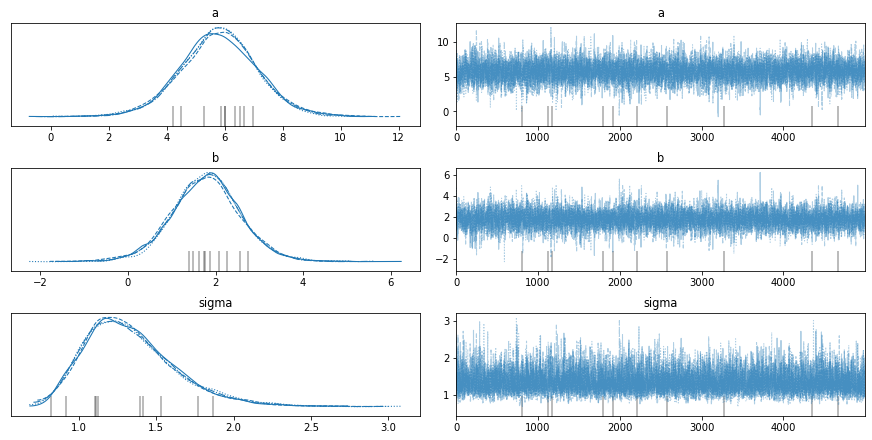

In [21]:
plt.figure(figsize=(7, 7))
pm.traceplot(tr)

### <center>A/B test</center>

In [22]:
test = pd.DataFrame(dict(click=(101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101),
                         group='test'))
control = pd.DataFrame(dict(click=(99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99),
                            group='control'))

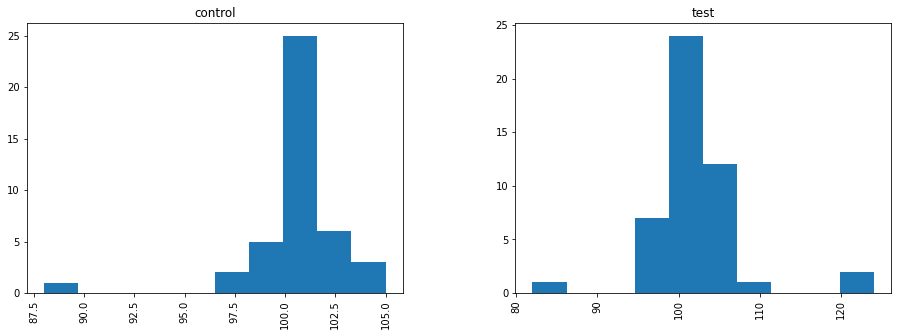

In [23]:
trial_data = pd.concat([test, control], ignore_index=True)
trial_data.hist('click', by='group', figsize=(15,5))
plt.show()

### <center>Classico Test T di Student con Scipy </center>

In [24]:
stats.ttest_ind(control['click'], test['click'], equal_var=False)

Ttest_indResult(statistic=-1.622190457290228, pvalue=0.10975381983712831)

### <center>Test T di Student bayesiano</center>

In [25]:
with pm.Model() as click_model:
    
    μ_0 = pm.Normal('μ_0', 100, sigma=10)
    μ_1 = pm.Normal('μ_1', 100, sigma=10)

In [26]:
with click_model:
    σ_0 = pm.Uniform('σ_0', lower=0, upper=20)
    σ_1 = pm.Uniform('σ_1', lower=0, upper=20)

In [27]:
with click_model:
    ν = pm.Exponential('ν_minus_one', 1/29.) + 1

/Users/marcogoldin/anaconda3/envs/bayes/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


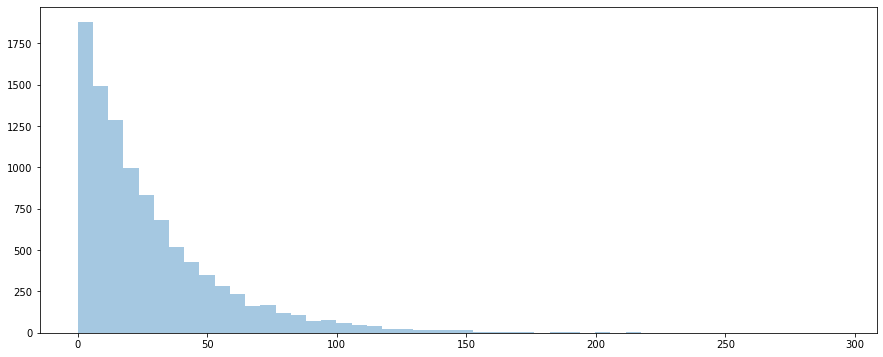

In [28]:
fig=plt.figure(figsize=(15,6))
sns.distplot(pm.Exponential.dist(1/29).random(size=10000), kde=False);
plt.show()

In [29]:
from pymc3 import StudentT

with click_model:

    test_group = StudentT('test_click', nu=ν, mu=μ_1, lam=σ_1**-2, observed=test.click)
    control_group = StudentT('control_click', nu=ν, mu=μ_0, lam=σ_0**-2, observed=control.click)


### <center>Una volta creato il modello, quello che ci interessa sono le "quantità" a posteriori.</center>
### <center>Vogliamo calcolare la differenza delle medie tra il il gruppo control e il gruppo test.</center>
---

In [30]:
from pymc3 import Deterministic

with click_model:
    
    diff_of_means = Deterministic('diff delle medie', μ_1 - μ_0)
    
    effect_size = Deterministic('effect size', 
                        diff_of_means / np.sqrt((σ_1**2 + σ_0**2) / 2))

In [31]:
with click_model:
    
    trace = pm.sample(1000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, σ_1, σ_0, μ_1, μ_0]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


### <center>HDI</center>
#### <center>nell'approccio bayesiano a test dell'ipotesi l'*High Density Interval* viene considerato una metrica più attendibile per le distribuzioni a posteriori.</center>
#### <center>I valori all'interno dell'HDI hanno tutti alta densità di probabilità (quindi affidabilità) rispetto a qualsiasi valore all'esterno dello stesso.</center>

/Users/marcogoldin/anaconda3/envs/bayes/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


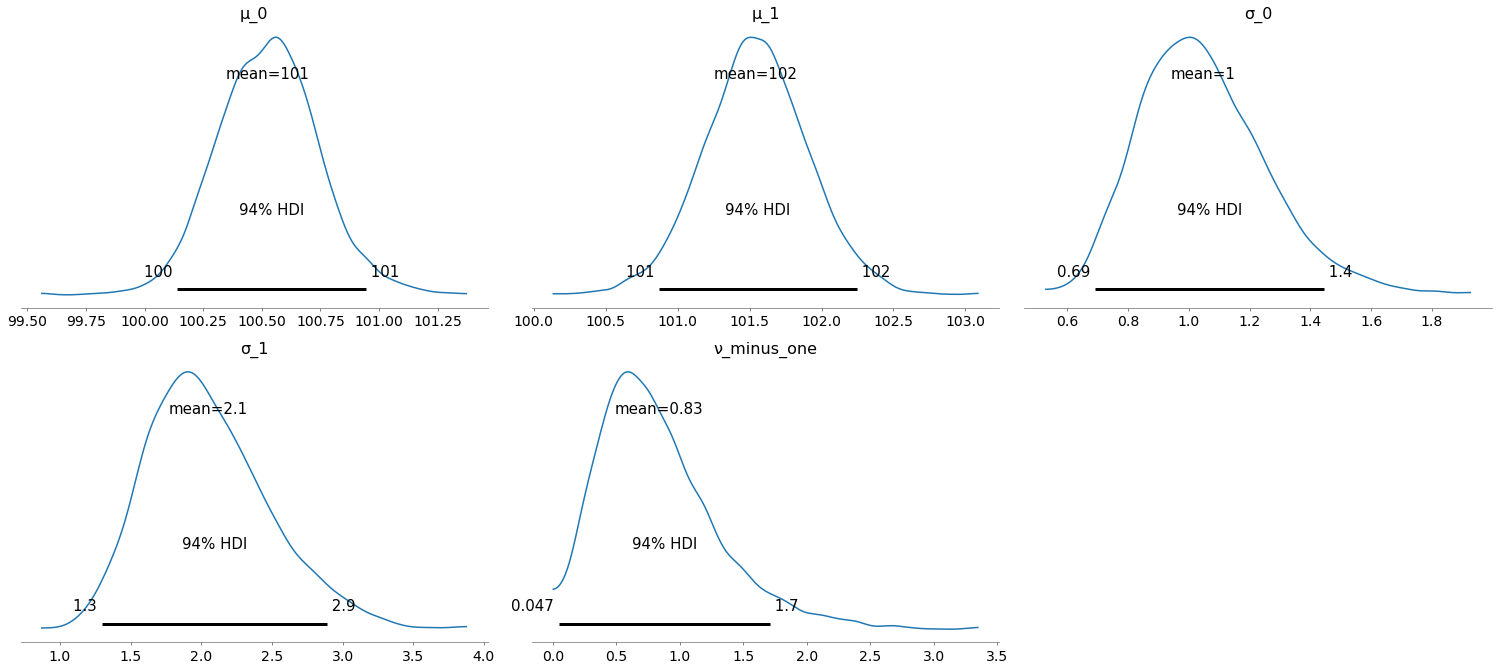

In [32]:
pm.plot_posterior(trace[100:], var_names=['μ_0', 'μ_1', 'σ_0', 'σ_1', 'ν_minus_one']);

/Users/marcogoldin/anaconda3/envs/bayes/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


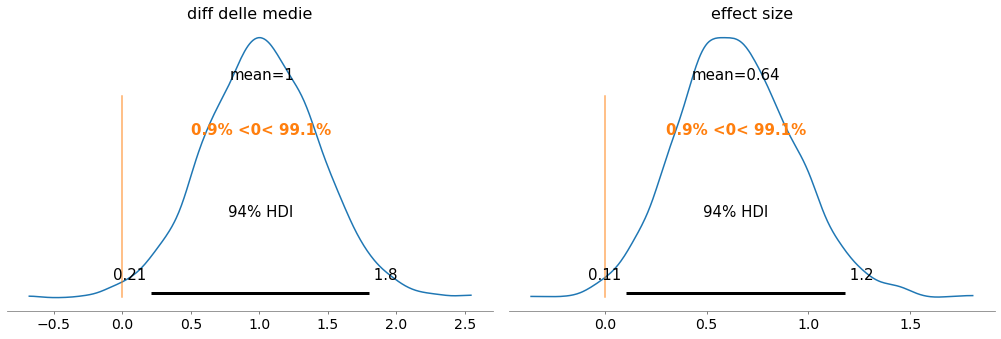

In [33]:
pm.plot_posterior(trace[100:], 
          var_names=['diff delle medie', 'effect size'],
          ref_val=0);

conclusioni: la probabilità a posteriori che la media dei click del gruppo test sia più alta è 0.99

### <center>Breve bibliografia</center>

- 2019, [Statistical Rethinking. A Bayesian Course with Examples in R and Stan *(& PyMC3 & brms & Julia too)*](http://xcelab.net/rm/statistical-rethinking/)
  - [Github](https://github.com/AustinRochford/Statistical-Rethinking-with-Python-and-PyMC3)
  
- 2018, [Bayesian Analysis with Python. Introduction to statistical modeling and probabilistic
programming using PyMC3 and ArviZ](https://www.packtpub.com/product/bayesian-analysis-with-python-second-edition/9781789341652)
  - [Github](https://github.com/aloctavodia/BAP)
  
- [Probabilistic Programming & Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)
  - [Tensorflow porting](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_TFP.ipynb)

In [34]:
import sys, IPython, platform
import scipy
import matplotlib
print(f"Questo notebook è stato creato su MacBook Pro {platform.processor()} {platform.machine()} {platform.mac_ver()[0]} usando:\n \
Python {sys.version[:5]}\n \
IPython {IPython.__version__}\n \
PyMC3 {pm.__version__}\n \
NumPy {np.__version__ }\n \
SciPy {scipy.__version__}\n \
Matplotlib {matplotlib.__version__}\n \
Seaborn {sns.__version__} \n") 


Questo notebook è stato creato su MacBook Pro i386 x86_64 10.15.7 usando:
 Python 3.8.5
 IPython 7.18.1
 PyMC3 3.9.3
 NumPy 1.19.1
 SciPy 1.5.0
 Matplotlib 3.3.1
 Seaborn 0.11.0 

